In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename)) # 파일경로의 절대경로 출력 

/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4329.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4223.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4253.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4190.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4354.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4136.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4226.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4214.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4888.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4170.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4323.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4262.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4788.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4657.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4387.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4255.jpg
/kaggle/

### 디렉토리와 jpeg 파일명을 읽어서 파일의 절대경로 위치와 학습/테스트 데이터 셋 여부, 해당 이미지의 label 값을 설정 

In [2]:
paths = []
dataset_gubuns = []
label_gubuns = []
# os.walk()를 이용하여 특정 디렉토리 밑에 있는 모든 하위 디렉토리를 모두 조사. 
# cat-and-dog 하위 디렉토리 밑에 jpg 확장자를 가진 파일이 모두 이미지 파일임
# cat-and-dog 밑으로 /train/, /test/ 하위 디렉토리 존재(학습, 테스트 용 이미지 파일들을 가짐)

for dirname, _, filenames in os.walk('/kaggle/input/cat-and-dog'):
    for filename in filenames:
        # 이미지 파일이 아닌 파일도 해당 디렉토리에 있음.
        if '.jpg' in filename:
            # 파일의 절대 경로를 file_path 변수에 할당. 
            file_path = dirname+'/'+ filename
            paths.append(file_path)
            # 파일의 절대 경로에 training_set, test_set가 포함되어 있으면 데이터 세트 구분을 'train'과 'test'로 분류. 
            if '/training_set/' in file_path:
                dataset_gubuns.append('train')  
            elif '/test_set/' in file_path:
                dataset_gubuns.append('test')
            else: dataset_gubuns.append('N/A')
            
            # 파일의 절대 경로에 dogs가 있을 경우 해당 파일은 dog 이미지 파일이고, cats일 경우는 cat 이미지 파일임. 
            if 'dogs' in file_path:
                label_gubuns.append('DOG')
            elif 'cats' in file_path:
                label_gubuns.append('CAT')
            else: label_gubuns.append('N/A')

In [3]:
paths[:10] , dataset_gubuns[:10], label_gubuns[:10]

(['/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4329.jpg',
  '/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4223.jpg',
  '/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4253.jpg',
  '/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4190.jpg',
  '/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4354.jpg',
  '/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4136.jpg',
  '/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4226.jpg',
  '/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4214.jpg',
  '/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4888.jpg',
  '/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4170.jpg'],
 ['test',
  'test',
  'test',
  'test',
  'test',
  'test',
  'test',
  'test',
  'test',
  'test'],
 ['DOG', 'DOG', 'DOG', 'DOG', 'DOG', 'DOG', 'DOG', 'DOG', 'DOG', 'DOG'])

### 위에서 생성된 이미지 파일의 절대 경로, 데이터 세트 구분, Lable값을 DataFrame으로 생성. 

In [4]:
pd.set_option('display.max_colwidth', 200)

data_df = pd.DataFrame({'path':paths, 'dataset':dataset_gubuns, 'label':label_gubuns})
print('data_df shape:', data_df.shape)
data_df.head(10)

data_df shape: (10028, 3)


,path,dataset,label
0,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4329.jpg,test,DOG
1,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4223.jpg,test,DOG
2,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4253.jpg,test,DOG
3,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4190.jpg,test,DOG
4,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4354.jpg,test,DOG
5,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4136.jpg,test,DOG
6,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4226.jpg,test,DOG
7,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4214.jpg,test,DOG
8,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4888.jpg,test,DOG
9,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4170.jpg,test,DOG


In [5]:
# 데이터 세트값 분포 및 Label 값 분포를 확인한다. 
print(data_df['dataset'].value_counts())
print(data_df['label'].value_counts())

train    8005
test     2023
Name: dataset, dtype: int64
DOG    5017
CAT    5011
Name: label, dtype: int64


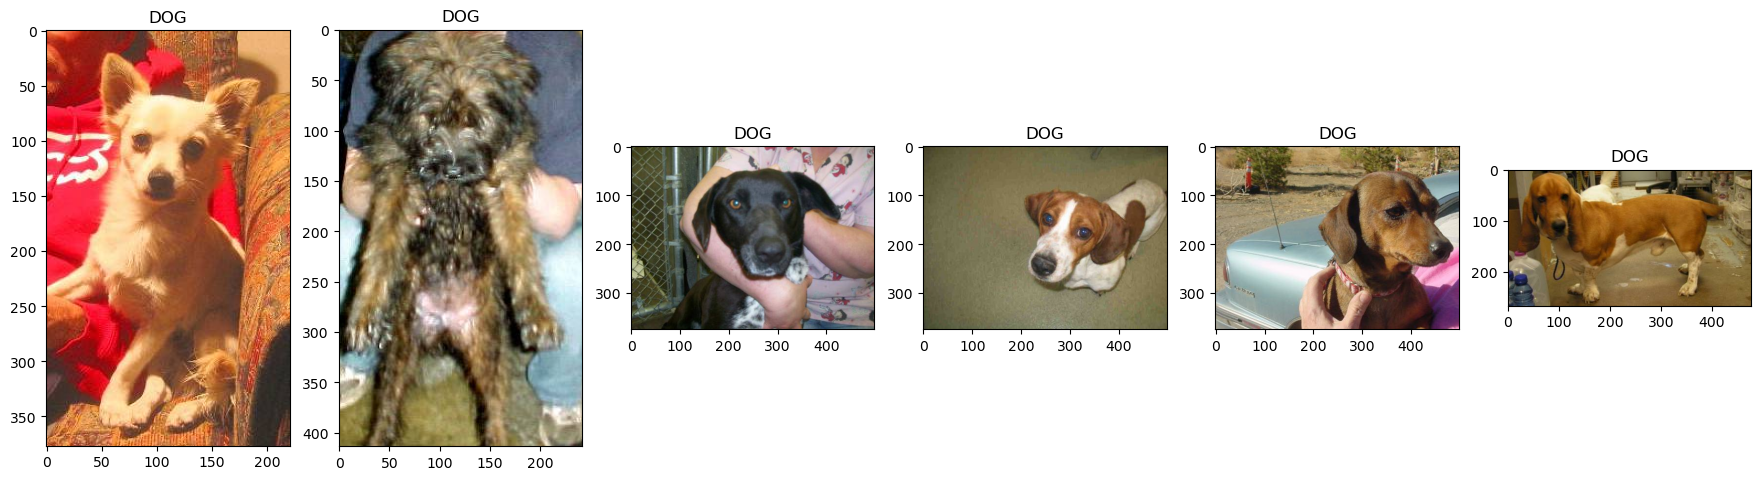

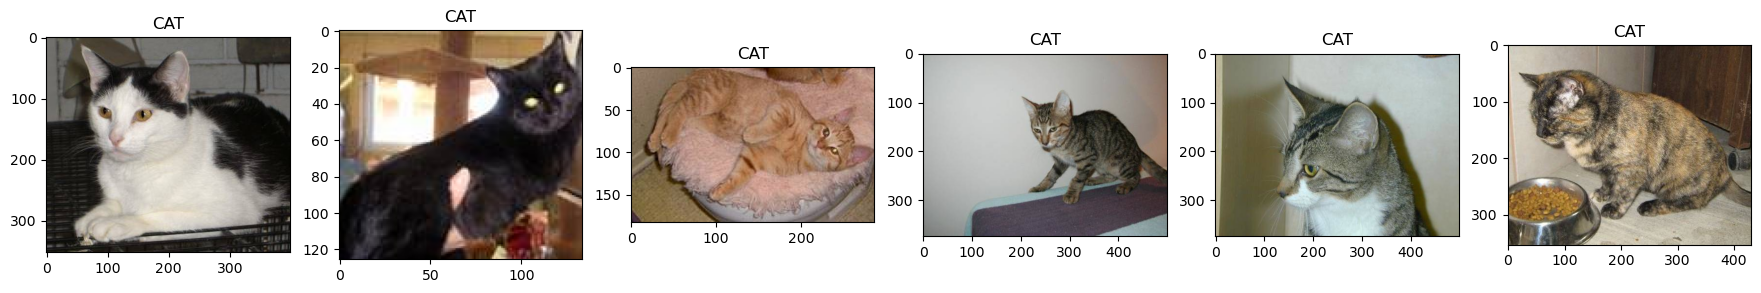

In [6]:
# DOG와 CAT의 이미지 파일 절대 경로를 cv2.imread()로 읽어서 image array로 로드하고 이미지 시각화
# 이미지별로 서로 다른 이미지 사이즈를 가지고 있음. 
import matplotlib.pyplot as plt
import cv2
%matplotlib inline 

def show_grid_images(image_path_list, ncols=8, augmentor=None, title=None):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        image = cv2.cvtColor(cv2.imread(image_path_list[i]), cv2.COLOR_BGR2RGB)
        axs[i].imshow(image)
        axs[i].set_title(title)  
        
dog_image_list = data_df[data_df['label']=='DOG']['path'].iloc[:6].tolist() # label이 DOG이면 path를 가져온다는 의미 (6개만) (넘파이 배열로 반환)
show_grid_images(dog_image_list, ncols=6, title='DOG')

cat_image_list = data_df[data_df['label']=='CAT']['path'].iloc[:6].tolist() # label이 CAT이면 path를 가져온다는 의미 (6개만) (넘파이 배열로 반환)
show_grid_images(cat_image_list, ncols=6, title='CAT')

In [7]:
for image_path in dog_image_list:
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    print('image shape:', image.shape)
    
print('image height shape:', image[:, 0, 0].shape)
print('image width shape:', image[0, :, 0].shape)
print('image size:', image[:, :, 0].shape)

print('### image array:\n', image)

image shape: (377, 221, 3)
image shape: (414, 242, 3)
image shape: (375, 499, 3)
image shape: (375, 499, 3)
image shape: (375, 499, 3)
image shape: (267, 478, 3)
image height shape: (267,)
image width shape: (478,)
image size: (267, 478)
### image array:
 [[[ 81  65  31]
  [ 81  65  31]
  [ 81  65  31]
  ...
  [ 88  46  21]
  [ 85  41  14]
  [ 85  39  13]]

 [[ 81  65  31]
  [ 81  65  31]
  [ 81  65  31]
  ...
  [ 77  37  11]
  [ 79  35  10]
  [ 80  36   9]]

 [[ 81  65  31]
  [ 81  65  31]
  [ 81  65  29]
  ...
  [ 75  38  11]
  [ 79  37  12]
  [ 81  39  14]]

 ...

 [[ 94  95 100]
  [ 67  70  77]
  [ 45  49  58]
  ...
  [125  97  47]
  [126  98  48]
  [126  98  48]]

 [[ 68  73  79]
  [ 48  52  61]
  [ 32  38  50]
  ...
  [125  97  47]
  [126  98  48]
  [126  98  48]]

 [[ 49  56  64]
  [ 33  42  51]
  [ 25  33  46]
  ...
  [125  97  47]
  [125  97  47]
  [126  98  48]]]


### Preprocessing 과 Data Loading 메커니즘
* (초기) Keras는 Preprocessing과 Data Loading을 ImageDataGenerator 객체와 model의 fit_generator()가 상호 연결되어 수행. 
* model의 fit_generator()가 인자로 ImageDataGenerator가 생성한 generator 객체를 입력 받아서 image 파일부터 Model에 array/Tensor값 입력까지 Pipeline Stream으로 이어지게 구성. 
* generator 를 통해서 model에 Tensor로 공급하는 로직은 아래와 같음. 
* image 파일을 image array로 로드-> preprocessing 적용(augmentation -> array 값 scale 조정(0~1사이 값) -> array 크기 resize-> Normalization 적용)
* Label값 인코딩(문자열을 단일 숫자값/원-핫 인코딩) 또한 generator기반으로 손쉽게 변경해줌.
* 실제 Preprocessing과 Data Loading은 Model에서 fit_generator()를 호출하기 전까지는 수행되지 않음. 


### Preprocessing
* image file을 image array로 변환 시 0 ~ 1사이의 float형(float32)으로 변경. 
* image array size를 고정 크기로 재 조정.(예를 들어 224 x 224 )
* augmentation 적용.
* Normalization(평균과 표준 편차 재 조정)
* Label값은 binary classification 이냐 multiple classification에 따라 숫자형 값 Encoding. 
* multiple classification일 경우 Label Encoding을 One-hot encoding 할 지 결정. 

### Data Loading
* os에 있는 image 파일을 메모리로 array 형태로 로딩. 
* 이때 대량의 image 파일을 메모리로 loading 할 경우 메모리가 감당할 수 없으므로 일정 크기 단위로 array 변환. 즉 BATCH 크기 단위로 array 로딩. 

### ImageDataGenerator 객체 생성
* ImageDataGenerator 객체 생성시 인자로 augmentation과 rescale에 대한 인자값을 입력하여 Preprocessing 환경 설정. 

### ImageDataGenerator 객체의 flow_from_directory(), flow_from_dataframe() 호출
* 생성된 ImageDataGenerator 객체의 flow_from_directory() 메소드를 호출하여 Data Loading 환경 설정. 
* flow_from_directory()는 인자로 입력된 directory에 해당하는 디렉토리에 위치한 서브 디렉토리등에서 모든 image 파일을 검색. 
* 이때 바로 아래 서브 디렉토리의 이름을 Label로 인식하고, 해당 서브 디렉토리에 있는 이미지들을 해당 Label에 속하는 이미지 파일로 간주
* class_mode로 Label Encoding을 자동으로 수행. 
    * class_mode='categorical' 일 경우 문자열 Label을 원-핫 인코딩
    * class_mode='sparse' 일 경우 문자열 Label을 숫자값으로 인코딩
    * class_mode='binary' 일 경우 문자열 Label을 0/1 숫자값으로 인코딩
* batch_size로 한번에 읽어올 이미지 파일 갯수 설정(즉 Batch 크기 설정).
    * 모든 이미지 파일을 한번에 Numpy Array로 변환할 경우 메모리가 부족하게 되므로 수십개 단위로 이미지 파일을 한번에 읽어옴.
* target_size로 Model에 입력하기 위해서 원본 이미지의 크기를 변경할 resize 설정. 
* shuffle은 읽어온 데이터를 원래 순서대로가 아닌 섞어서 전달할지 여부
    

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Preprocessing과 Data Loading을 동시에 적용. 단 실제 Preprocessing과 Data Loading을 Model에서 fit_generator()를 호출하기 전까지는 동작하지 않음. 
# augmentation은 horizontal_flip(좌우 반전)만 적용하고 0 ~ 255의 pixel값을 0 ~ 1 로 scale만 적용. 
train_gen = ImageDataGenerator(horizontal_flip=True, rescale=1/255.)

# ImageDataGenerator 객체의 flow_from_directory() 메소드를 호출. 
# class_mode='categorical' 로 Label 데이터를 원-핫 인코딩, 이미지 array는 224 x 224 로 변경. Batch 크기는 64로 설정. 
train_flow_gen = train_gen.flow_from_directory(directory='/kaggle/input/cat-and-dog/training_set/training_set' # image file이 있는 디렉토리 (이보다 한칸 더들어간 dogs를 label 명으로 판단한다.)
                                                         ,target_size=(224, 224) # 원본 이미지를 최종 resize할 image size
                                                         ,class_mode='categorical' # 문자열 label을 자동으로 one-hot encoding 시켜줌. 
                                                         ,batch_size=64
                                               )

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

Found 8005 images belonging to 2 classes.


### next()를 이용하여 flow_from_directory()로 반환된 Iterator 객체를 강제로 호출하여 어떤 값이 만들어 지는지 확인.  

In [9]:
# next()를 flow_from_directory()로 반환된 Iterator 객체를 강제로 호출하여 어떤 값이 만들어 지는지 확인.  
# 튜플형태로 반환되고 튜플의 첫번째값은 image array, 두번째 값은 label array 임
# image array는 0~1 사이 값인 float32로 변환됨. label array는 2개 column으로 원-핫 인코딩 됨. 
# next(iter(train_flow_gen))
images_array, labels_array = next(train_flow_gen)
print(images_array.shape, labels_array.shape)
print(images_array[:1], labels_array[:1]) # 한 레코드만 출력

(64, 224, 224, 3) (64, 2)
[[[[0.04705883 0.04705883 0.09411766]
   [0.04313726 0.04313726 0.09019608]
   [0.04705883 0.04705883 0.09411766]
   ...
   [0.02352941 0.         0.        ]
   [0.01568628 0.         0.        ]
   [0.01568628 0.         0.        ]]

  [[0.03921569 0.03921569 0.08627451]
   [0.04313726 0.04313726 0.09019608]
   [0.04705883 0.04705883 0.09411766]
   ...
   [0.02352941 0.         0.        ]
   [0.01568628 0.         0.        ]
   [0.01568628 0.         0.        ]]

  [[0.03529412 0.03529412 0.08235294]
   [0.04313726 0.04313726 0.09019608]
   [0.04705883 0.04705883 0.09411766]
   ...
   [0.02352941 0.         0.        ]
   [0.01568628 0.         0.        ]
   [0.01568628 0.         0.        ]]

  ...

  [[0.20000002 0.1764706  0.18431373]
   [0.20392159 0.17254902 0.16470589]
   [0.21176472 0.18039216 0.17254902]
   ...
   [0.20784315 0.1764706  0.16862746]
   [0.20392159 0.17254902 0.16470589]
   [0.20392159 0.17254902 0.16470589]]

  [[0.19215688 0.16

In [10]:
# image array와 label array의 shape 확인. 
# batch_size만큼 한꺼번에 추출되므로 image array는 4차원, label array는 batch_size와 원-핫 인코딩을 감안하여 2차원 데이터
images_array = next(train_flow_gen)[0]
labels_array = next(train_flow_gen)[1]
print('##### image array shape:', images_array.shape)
print('#### label array shape:', labels_array.shape)

##### image array shape: (64, 224, 224, 3)
#### label array shape: (64, 2)


In [11]:
# label array가 원-핫 인코딩 되어 있는지 확인.
labels_array

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.

### Model을 생성
* Input의 shape는 VGG, ResNet, Xception 모델이 원래 학습 이미지 사이즈로 가졌던 224 x 224 로 설정.   
* 이를 위해 flow_from_directory()로 원본 이미지를 224 x 224 로 변환함.  

In [12]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

In [13]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        base_model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        base_model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        base_model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    
    bm_output = base_model.output

    x = GlobalAveragePooling2D()(bm_output)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu', name='fc1')(x)
    # 개와 고양이 2 종류이므로 Dense의 units는 2
    output = Dense(2, activation='softmax', name='output')(x)

    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
        
    return model

### optimizer, loss, metric 설정
* 위에서 flow_from_directory(class_mode='categorical') 로 설정했기에 label은 원핫 인코딩 되어 모델로 입력됨
* 따라서 loss는 categorical_crossentropy 를 적용해야 함. 

In [14]:
# 위에서 flow_from_directory(class_mode='categorical') 로 설정했기에 label은 원핫 인코딩 되어 모델로 입력됨
# loss 는 원핫 인코딩을 기반으로 계산이 될 수 있는 loss 함수 필요. 여기서는 categorical_crossentropy를 써야함
# 만약 위에서 class_mode='sparse' 라면 loss는 sparse_categorical_crossentropy 여야 함.
model = create_model(model_name='xception', verbose=True)
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

83683744/83683744 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                      

### 모델의 fit_generator()를 호출하여 학습 수행. 
* fit_generator()는 앞에서 생성한 iterator 객체를 인자로 받아서 image array, label array를 배치 크기 만큼 순차적으로 데이터로 가져와 학습 수행.   
* 입력 인자로 generator는 앞에서 생성한 image_data_generator를 입력
* epochs는 전체 학습 데이터를 가져와서 학습하는 횟수 의미
* steps_per_epoch는 전체 학습 데이터를 몇번 배치 작업으로 수행하는가를 의미. generator는 배치크기를 알수 있지만 전체 데이터에서 이를 batch 만큼 데이터를 몇번 가져와야 전체 데이터 학습을 수행할 지 알 수 없으므로 이를 설정해 줌. 전체 데이터 건수/배치 크기이며, 소수점 이하는 무조건 +1 로 절삭. 즉 전체 데이터 1001개 이고, 배치 크기가 10이면 steps_per_epochs는 101 임. 

In [15]:
# train 데이터 건수는 generator의 samples 속성을 이용하여 가져올 수 있음. 
train_image_cnt = train_flow_gen.samples 
print(train_image_cnt)
# batch size는 64, 학습 데이터 image 개수는 8005 
model.fit_generator(train_flow_gen, epochs=15, # model.fit_generator() 는 deprecated될 예정임 (대신 model.fit() 용)
                    steps_per_epoch=int(np.ceil(train_image_cnt/BATCH_SIZE))
                   )
                    
# 앞으론 fit()을 사용해야함. (fit_generator()와 같이 동작함)
# model.fit(train_flow_gen, epochs=15, steps_per_epoch=int(np.ceil(train_image_cnt/BATCH_SIZE)))

8005


/tmp/ipykernel_28/3086175610.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_flow_gen, epochs=15,


Epoch 1/15
126/126 [==============================] - 127s 672ms/step - loss: 0.1193 - accuracy: 0.9554
Epoch 2/15
126/126 [==============================] - 64s 504ms/step - loss: 0.0583 - accuracy: 0.9771
Epoch 3/15
126/126 [==============================] - 64s 504ms/step - loss: 0.0526 - accuracy: 0.9794
Epoch 4/15
126/126 [==============================] - 64s 505ms/step - loss: 0.0451 - accuracy: 0.9836
Epoch 5/15
126/126 [==============================] - 64s 505ms/step - loss: 0.0323 - accuracy: 0.9885
Epoch 6/15
126/126 [==============================] - 64s 505ms/step - loss: 0.0346 - accuracy: 0.9889
Epoch 7/15
126/126 [==============================] - 64s 504ms/step - loss: 0.0285 - accuracy: 0.9899
Epoch 8/15
126/126 [==============================] - 64s 505ms/step - loss: 0.0123 - accuracy: 0.9958
Epoch 9/15
126/126 [==============================] - 64s 505ms/step - loss: 0.0261 - accuracy: 0.9919
Epoch 10/15
126/126 [==============================] - 64s 504ms/step - 

### Test 데이터로 성능 검증
* Test를 위한 데이터 Generator 생성. 

In [16]:
# test data는 augmentation을 적용할 필요 없음. 
test_gen = ImageDataGenerator(rescale=1/255.)
test_flow_gen = test_gen.flow_from_directory(directory='/kaggle/input/cat-and-dog/test_set/test_set' # image file이 있는 디렉토리 
                                                         ,target_size=(IMAGE_SIZE, IMAGE_SIZE) # 원본 이미지를 최종 resize할 image size
                                                         ,class_mode='categorical' # 문자열 label을 자동으로 one-hot encoding 시켜줌. 
                                                         ,batch_size=BATCH_SIZE
                                                         ,shuffle=False
                                                         )

Found 2023 images belonging to 2 classes.


In [17]:
# 모델의 evaluate_generator()를 호출하여 Test 데이터의 성능 측정.(evaluate()도 무방)
model.evaluate_generator(test_flow_gen)

/tmp/ipykernel_28/3444603928.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_flow_gen)


[0.11747339367866516, 0.9688581228256226]

### ImageDataGenerator 객체와 flow_from_dataframe()
* flow_from_dataframe()도 flow_from_directory()와 유사하게 메타 데이터 소스로 부터 이미지 파일과 label을 numpy array로 로드
* flow_from_dataframe()은 DataFrame 메타 데이터로 부터 로드함. 
* 일반적으로 flow_from_dataframe()이 데이터 조작등이 더 편하기 때문에 flow_from_directory() 보다 더 애용됨. 

### 이미지 파일의 절대경로 위치와 데이터세트 유형, label값을 가지는 메타 테이블용 DataFrame을 생성. 

In [18]:
pd.set_option('display.max_colwidth', 200)

data_df = pd.DataFrame({'path':paths, 'dataset':dataset_gubuns, 'label':label_gubuns})
print(data_df['dataset'].value_counts())
data_df.head(10)

train    8005
test     2023
Name: dataset, dtype: int64


,path,dataset,label
0,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4329.jpg,test,DOG
1,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4223.jpg,test,DOG
2,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4253.jpg,test,DOG
3,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4190.jpg,test,DOG
4,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4354.jpg,test,DOG
5,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4136.jpg,test,DOG
6,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4226.jpg,test,DOG
7,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4214.jpg,test,DOG
8,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4888.jpg,test,DOG
9,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4170.jpg,test,DOG


### 학습용/검증용/테스트용 DataFrame 을 생성

In [19]:
data_df['dataset']=='train'

0        False
1        False
2        False
3        False
4        False
         ...  
10023     True
10024     True
10025     True
10026     True
10027     True
Name: dataset, Length: 10028, dtype: bool

In [20]:
train_df = data_df[data_df['dataset']=='train']
test_df = data_df[data_df['dataset']=='test']
print('train_df shape:', train_df.shape, 'test_df shape:', test_df.shape)

train_df shape: (8005, 3) test_df shape: (2023, 3)


In [21]:
from sklearn.model_selection import train_test_split

# scikit learn의 train_test_split()을 이용하여 train용, validation용 DataFrame을 생성
# stratify를 이용하여 label 값을 균등하게 분할 
tr_df, val_df = train_test_split(train_df, test_size=0.15, stratify=train_df['label'], random_state=2021)
print('tr_df shape:', tr_df.shape, 'val_df shape:', val_df.shape)
print('tr_df label distribution:\n', tr_df['label'].value_counts())
print('val_df label distributuion:\n', val_df['label'].value_counts())

tr_df shape: (6804, 3) val_df shape: (1201, 3)
tr_df label distribution:
 DOG    3404
CAT    3400
Name: label, dtype: int64
val_df label distributuion:
 DOG    601
CAT    600
Name: label, dtype: int64


### 학습과 검증용 ImageDataGenerator 생성.
* flow_from_dataframe()은 인자로 dataframe = 메타 데이터용 DataFrame 입력 받음. 
* x_col은 메타 데이터용 DataFrame에서 image 파일의 절대경로 위치를 나타내는 column명을 의미
* y_col은 메타 데이터용 DataFrame에서 label값 column명을 의미. 이 때 y_col로 지정된 컬럼은 반드시 문자열(object type)이 되어야 함. 
* y_col의 경우 미리 encoding(label 또는 원핫)을 해서 숫자값으로 절대 변경하면 안됨.  
*  softmax가 아닌 sigmoid로 최종 출력하므로 class_mode='binary' 로 Label 데이터 변환, 이미지 array는 224 x 224 로 변경. Batch 크기는 64로 설정. 

In [22]:
# IMAGE 크기와 BATCH 크기를 위한 환경 변수 설정. 
IMAGE_SIZE = 224
BATCH_SIZE = 64

### 학습용 ImageDataGenerator 생성과 Data generator 처리

In [23]:
# 학습용과 검증용 ImageDataGenerator 생성. 학습용은 augmentation + rescale적용. 검증용은 rescale만 적용 
# augmentation은 horizontal_flip(좌우 반전)만 적용하고 0 ~ 255의 pixel값을 0 ~ 1 로 scale만 적용. 
tr_generator = ImageDataGenerator(horizontal_flip=True, rescale=1/255.)

# ImageDataGenerator 객체의 flow_from_dataframe()) 메소드를 호출. 
# flow_from_dataframe()은 인자로 dataframe = 메타 데이터용 DataFrame 입력 받음. 
# x_col은 메타 데이터용 DataFrame에서 image 파일의 절대경로 위치를 나타내는 column명을 의미
# y_col은 메타 데이터용 DataFrame에서 label값 column명을 의미. 이 때 y_col로 지정된 컬럼은 반드시 문자열(object type)이 되어야 함. 
# y_col의 경우 미리 encoding(label 또는 원핫)을 해서 숫자값으로 절대 변경하면 안됨.  
# softmax가 아닌 sigmoid로 최종 출력하므로 class_mode='binary' 로 Label 데이터 변환, 이미지 array는 224 x 224 로 변경. Batch 크기는 64로 설정. 
tr_flow_gen = tr_generator.flow_from_dataframe(dataframe=tr_df # image file이 있는 디렉토리
                                      ,x_col='path'
                                      ,y_col='label'
                                      ,target_size=(IMAGE_SIZE, IMAGE_SIZE) # 원본 이미지를 최종 resize할 image size
                                      ,class_mode='binary' # 문자열 label을 자동 Encoding. 
                                      ,batch_size=BATCH_SIZE
                                      ,shuffle=True
                                      )

Found 6804 validated image filenames belonging to 2 classes.


In [24]:
images_array = next(tr_flow_gen)[0]
labels_array = next(tr_flow_gen)[1]
print('##### image array shape:', images_array.shape)
print('#### label array shape:', labels_array.shape)
print(images_array[0])
print(labels_array[0])

##### image array shape: (64, 224, 224, 3)
#### label array shape: (64,)
[[[0.69411767 0.69411767 0.64705884]
  [0.7019608  0.7019608  0.654902  ]
  [0.7137255  0.7058824  0.65882355]
  ...
  [0.42352945 0.40784317 0.37254903]
  [0.427451   0.41176474 0.37647063]
  [0.44705886 0.43137258 0.39607847]]

 [[0.69803923 0.69803923 0.6509804 ]
  [0.7058824  0.7058824  0.65882355]
  [0.7176471  0.70980394 0.6627451 ]
  ...
  [0.4156863  0.40000004 0.3647059 ]
  [0.43529415 0.41960788 0.38431376]
  [0.4431373  0.427451   0.3921569 ]]

 [[0.7019608  0.7019608  0.654902  ]
  [0.70980394 0.70980394 0.6627451 ]
  [0.72156864 0.7137255  0.6666667 ]
  ...
  [0.40784317 0.3921569  0.35686275]
  [0.43921572 0.42352945 0.38823533]
  [0.43921572 0.42352945 0.38823533]]

 ...

 [[0.94117653 0.9176471  0.854902  ]
  [0.94117653 0.9176471  0.854902  ]
  [0.9686275  0.94117653 0.8705883 ]
  ...
  [0.5647059  0.8196079  0.8431373 ]
  [0.5686275  0.81568635 0.8431373 ]
  [0.5647059  0.8117648  0.83921576]]

 

### 검증용 ImageDataGenerator 생성과 Data generator 처리

In [25]:
# 검증용 ImageDataGenerator는 rescale만 적용. 
val_generator = ImageDataGenerator(rescale=1/255.)
val_flow_gen = val_generator.flow_from_dataframe(dataframe=val_df # image file이 있는 디렉토리
                                      ,x_col='path'
                                      ,y_col='label'
                                      ,target_size=(IMAGE_SIZE, IMAGE_SIZE) # 원본 이미지를 최종 resize할 image size
                                      ,class_mode='binary' # 문자열 label을 자동으로 one-hot encoding 시켜줌. 
                                      ,batch_size=BATCH_SIZE
                                      ,shuffle=False
                                      )

Found 1201 validated image filenames belonging to 2 classes.


### 모델 생성

In [26]:
def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        base_model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        base_model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        base_model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    
    bm_output = base_model.output

    x = GlobalAveragePooling2D()(bm_output)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu', name='fc1')(x)
    # 최종 output 출력을 softmax에서 sigmoid로 변환. 
    output = Dense(1, activation='sigmoid', name='output')(x)

    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
        
    return model

In [27]:
model = create_model(model_name='xception')
# 최종 output 출력을 softmax에서 sigmoid로 변환되었으므로 binary_crossentropy로 변환 
model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 3번 iteration내에 validation loss가 향상되지 않으면 learning rate을 기존 learning rate * 0.2로 줄임.  
rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, mode='min', verbose=1)
# 5번 iteration내에 validation loss가 향상되지 않으면 더 이상 학습하지 않고 종료
ely_cb = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)

### fit() 또는 fit_generator() 호출하여 학습 수행.
* validation_data에는 앞에서 검증용으로 생성한 val_generator를 입력
* validation_steps는 검증용 데이터에 대한 steps_per_epoch임. 

In [28]:
# 학습과 검증용 steps_per_epoch 계산 
N_EPOCHS = 15

model.fit(tr_flow_gen, epochs=N_EPOCHS,
          steps_per_epoch=int(np.ceil(tr_df.shape[0]/BATCH_SIZE)),
          validation_data=val_flow_gen, 
          validation_steps=int(np.ceil(val_df.shape[0]/BATCH_SIZE)), 
          callbacks=[rlr_cb, ely_cb])

Epoch 1/15
107/107 [==============================] - 91s 587ms/step - loss: 0.1322 - accuracy: 0.9519 - val_loss: 0.4072 - val_accuracy: 0.9467 - lr: 0.0010
Epoch 2/15
107/107 [==============================] - 59s 549ms/step - loss: 0.0620 - accuracy: 0.9768 - val_loss: 0.2243 - val_accuracy: 0.9450 - lr: 0.0010
Epoch 3/15
107/107 [==============================] - 59s 548ms/step - loss: 0.0449 - accuracy: 0.9828 - val_loss: 0.1686 - val_accuracy: 0.9600 - lr: 0.0010
Epoch 4/15
107/107 [==============================] - 59s 549ms/step - loss: 0.0438 - accuracy: 0.9846 - val_loss: 0.2392 - val_accuracy: 0.9525 - lr: 0.0010
Epoch 5/15
107/107 [==============================] - 59s 548ms/step - loss: 0.0352 - accuracy: 0.9874 - val_loss: 0.1244 - val_accuracy: 0.9567 - lr: 0.0010
Epoch 6/15
107/107 [==============================] - 59s 552ms/step - loss: 0.0314 - accuracy: 0.9896 - val_loss: 0.1803 - val_accuracy: 0.9534 - lr: 0.0010
Epoch 7/15
107/107 [==============================] 

### 테스트용 ImageDataGenerator 생성과 Data generator 처리 후 Evaluation 수행

In [29]:
# test data는 augmentation을 적용할 필요 없음. 
test_generator = ImageDataGenerator(rescale=1/255.)
test_flow_gen = test_generator.flow_from_dataframe(dataframe=test_df # image file이 있는 디렉토리
                                      ,x_col='path'
                                      ,y_col='label'
                                      ,target_size=(IMAGE_SIZE, IMAGE_SIZE) # 원본 이미지를 최종 resize할 image size
                                      ,class_mode='binary' # 문자열 label을 자동으로 encoding. 
                                      ,batch_size=BATCH_SIZE
                                      ,shuffle=False
                                      )
# evaluation으로 성능 검증
model.evaluate(test_flow_gen)

Found 2023 validated image filenames belonging to 2 classes.
32/32 [==============================] - 7s 221ms/step - loss: 0.0399 - accuracy: 0.9891


[0.039851609617471695, 0.9891250729560852]

### image data의 scaling preprocessing 유형
* 0 ~ 1 사이, -1 ~ 1 사이, z-score 변환 중에 선택. 
* pretrained 모델은 주로 tf와 torch 프레임웍으로 생성 
* tf는 -1 ~ 1 택. torch는 전통적으로 z-score 변환(0 ~ 1로 scaling 후 ImageNet 데이터 세트의 이미지 채널별 평균값, 표준편차값을 이용하여 z score 변환 적용)

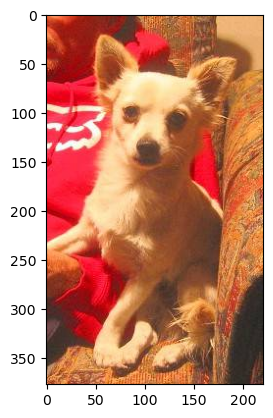

In [30]:
import cv2

# 임의의 이미지 한개 선택. 
image = cv2.cvtColor(cv2.imread(data_df['path'].iloc[0]), cv2.COLOR_BGR2RGB)
plt.imshow(image)

### tf 또는 torch 유형으로 변경하는 함수 생성. 

In [31]:
def preprocessing_scaling(x, mode='tf'):
    if mode == 'tf':
        x = x/127.5
        x -= 1.
    
    elif mode == 'torch':
        x = x/255.
        mean = [0.485, 0.456, 0.406]
        std = [0.229, 0.224, 0.225]
        
        x[:, :, 0] = (x[:, :, 0] - mean[0])/std[0]
        x[:, :, 1] = (x[:, :, 1] - mean[1])/std[1]
        x[:, :, 2] = (x[:, :, 2] - mean[2])/std[2]
        
    return x

scaled_image_tf = preprocessing_scaling(image, mode='tf')
scaled_image_torch = preprocessing_scaling(image, mode='torch')

### scale 된 이미지 pixel값의 histogram 시각화 

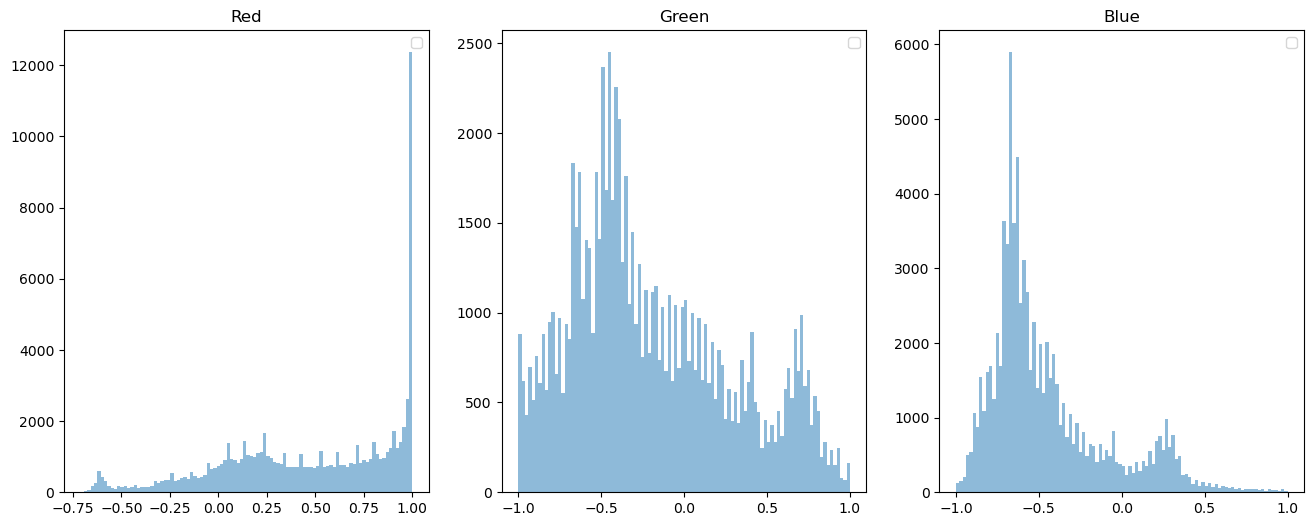

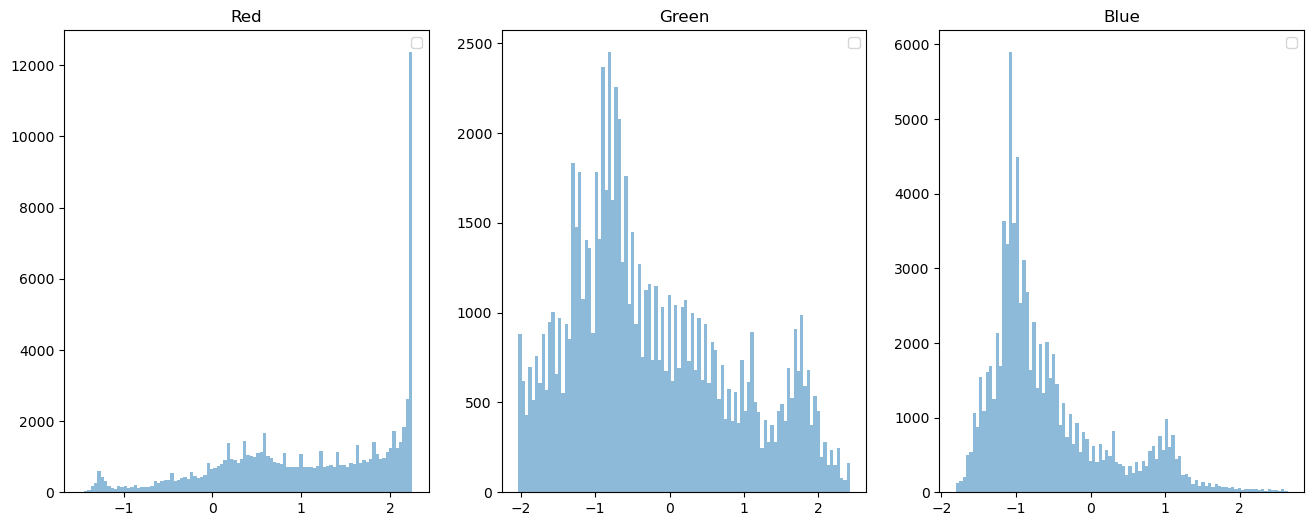

In [32]:
def show_pixel_histogram(image):
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

    for i in range(3):
        # i값 0 일때 Red 채널, i값 1일때 Green Channel, i값 2일때 Blue Channel Histogram 표현 
        axs[i].hist(image[:, :, i].flatten(), bins=100, alpha=0.5)
        axs[i].legend(loc='upper right')
        if i==0:
            title_str = 'Red'
        elif i==1:
            title_str = 'Green'
        else: 
            title_str = 'Blue'
        axs[i].set(title=title_str)
        
show_pixel_histogram(scaled_image_tf)
show_pixel_histogram(scaled_image_torch)

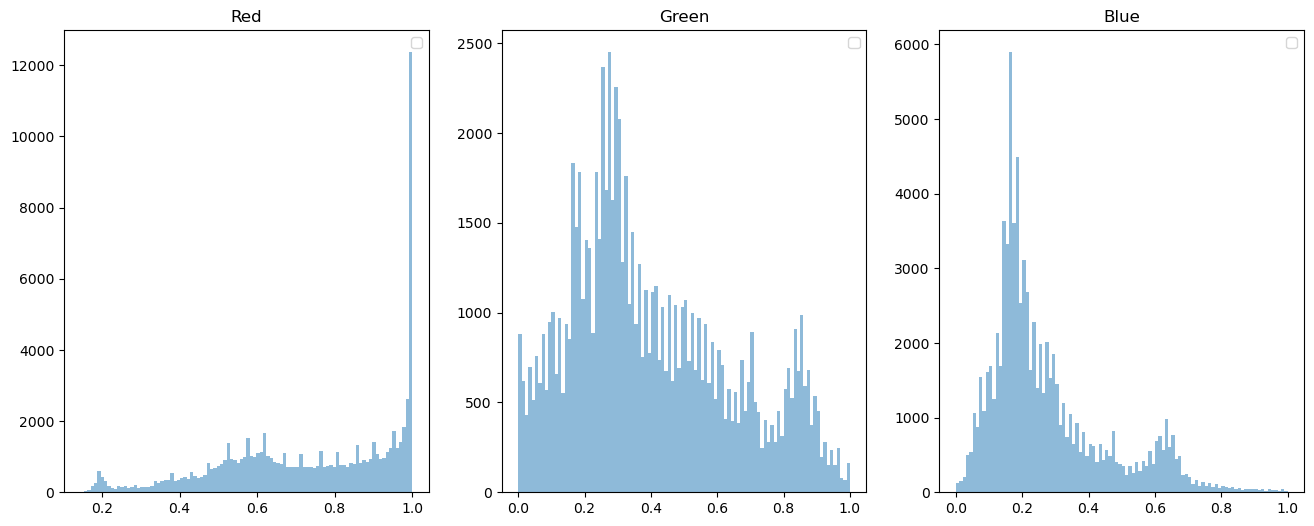

In [33]:
show_pixel_histogram(image/255.0)

### 개별 pretrained 모델들은 고유한 scaling 방식을 적용

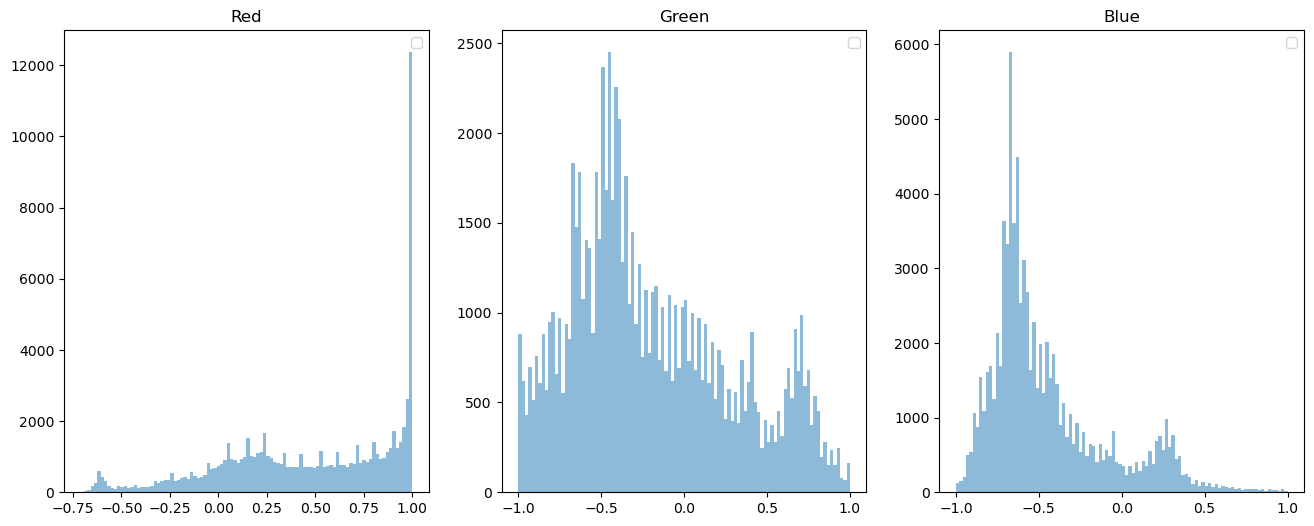

In [34]:
from tensorflow.keras.applications.xception import preprocess_input

# Xception의 scaling 방식은 tf
scaled_image_xception = preprocess_input(image)
show_pixel_histogram(scaled_image_xception)

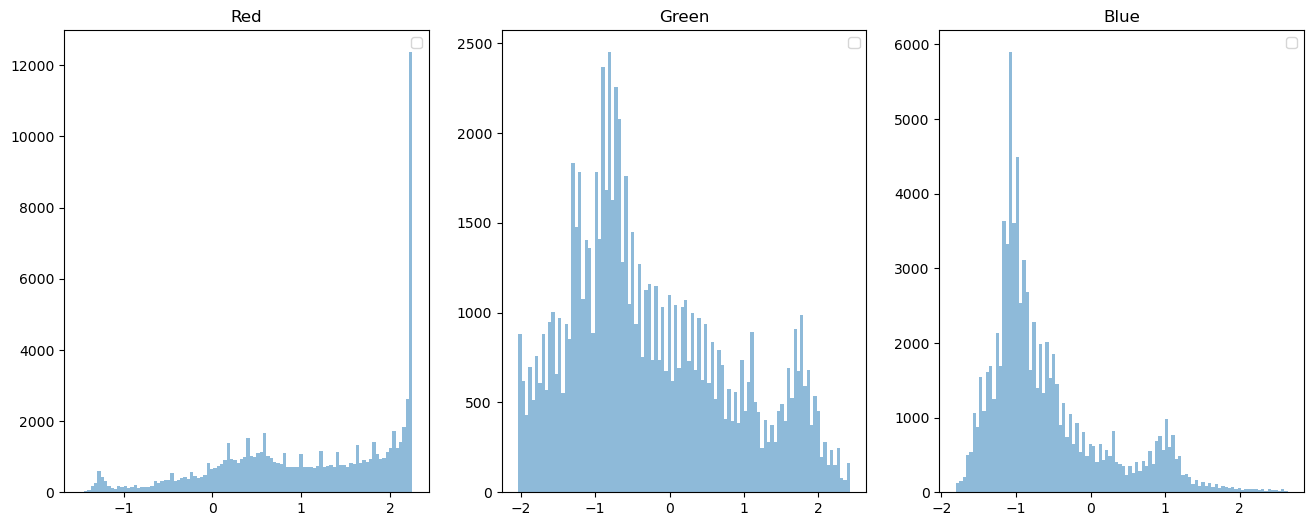

In [35]:
from tensorflow.keras.applications.densenet import preprocess_input

# DenseNet의 scaling 방식은 torch
scaled_image_densenet = preprocess_input(image)
show_pixel_histogram(scaled_image_densenet)

### ImageDataGenerator에 preprocess_input()을 적용시 preprocessing_function 파라미터를 사용 

In [36]:
from tensorflow.keras.applications.xception import preprocess_input

#tr_generator = ImageDataGenerator(horizontal_flip=True, rescale=1/255.)
tr_generator = ImageDataGenerator(horizontal_flip=True, preprocessing_function=preprocess_input)
tr_flow_gen = tr_generator.flow_from_dataframe(
                                      dataframe=tr_df # image file이 있는 디렉토리
                                      ,x_col='path'
                                      ,y_col='label'
                                      ,target_size=(IMAGE_SIZE, IMAGE_SIZE) # 원본 이미지를 최종 resize할 image size
                                      ,class_mode='binary' # 문자열 label을 자동 Encoding. 
                                      ,batch_size=BATCH_SIZE
                                      ,shuffle=True
                                      )

Found 6804 validated image filenames belonging to 2 classes.


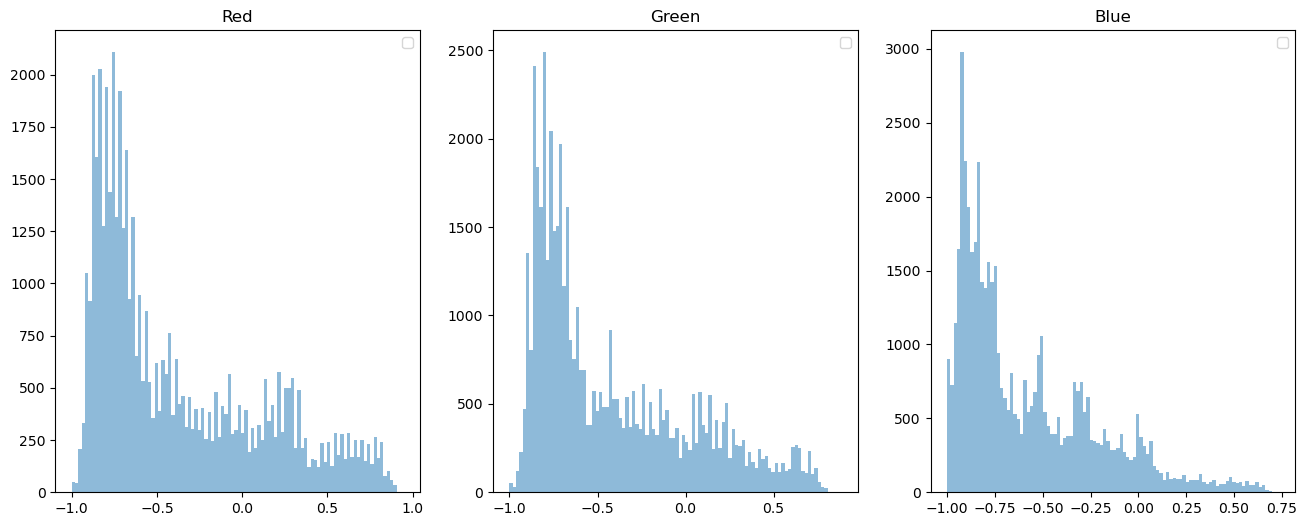

In [37]:
images_array = next(tr_flow_gen)[0]
labels_array = next(tr_flow_gen)[1]

show_pixel_histogram(images_array[0])